In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
#Loading the Dataset
train = pd.read_csv('train.csv')     #(42000, 785)
test = pd.read_csv('test.csv')       #(28000, 784)

In [76]:
y = train['label']                   #(42000,)
train = train.drop('label', axis =1)

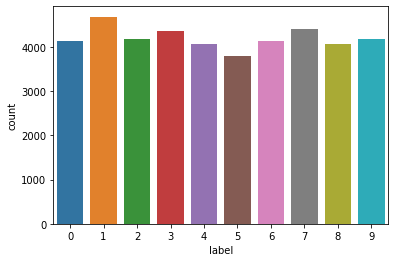

In [71]:
#Visualizing the Distribution of digits in labels
sns.countplot(y)

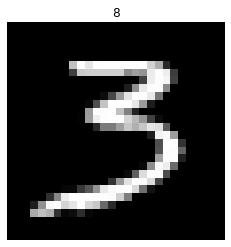

In [72]:
#Visualing an example 
img = train.iloc[25].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y.iloc[10])
plt.axis("off")
plt.show()

In [77]:
#Preprocessing the Data
train=train/225.0
test = test/225.0
# train.shape (42000, 784)
# test.shape (28000,784)
train = np.array(train)
test= np.array(test)
train = train.reshape(train.shape[0], 28, 28,1)      #(42000, 28, 28, 1)
test = test.reshape(test.shape[0], 28, 28,1)         #(28000, 28, 28, 2)
#Splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size=0.2)
print(Y_train)
#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

11090    0
28997    8
37838    5
19257    1
9491     6
        ..
33935    8
25835    4
13223    7
17314    9
25033    1
Name: label, Length: 33600, dtype: int64


In [78]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

# model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)            

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

Using TensorFlow backend.


TypeError: 'InputLayer' object is not iterable

In [79]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [82]:
#Training the model
history1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
525/525 [==============================] - 38s 73ms/step - loss: 0.5537 - acc: 0.8212 - val_loss: 0.2195 - val_acc: 0.9295
Epoch 2/15
525/525 [==============================] - 52s 99ms/step - loss: 0.1852 - acc: 0.9421 - val_loss: 0.0584 - val_acc: 0.9820
Epoch 3/15
525/525 [==============================] - 52s 98ms/step - loss: 0.1420 - acc: 0.9559 - val_loss: 0.0519 - val_acc: 0.9844
Epoch 4/15
525/525 [==============================] - 49s 94ms/step - loss: 0.1237 - acc: 0.9614 - val_loss: 0.0489 - val_acc: 0.9846
Epoch 5/15
525/525 [==============================] - 52s 100ms/step - loss: 0.1072 - acc: 0.9667 - val_loss: 0.0475 - val_acc: 0.9857
Epoch 6/15
525/525 [==============================] - 48s 91ms/step - loss: 0.1013 - acc: 0.9681 - val_loss: 0.0360 - val_acc: 0.9888
Epoch 7/15
525/525 [==============================] - 47s 89ms/step - loss: 0.0961 - acc: 0.9709 - val_loss: 0.0523 - val_acc: 0.9844
Epoch 8/15
525/525 [==============================] - 47s 89m

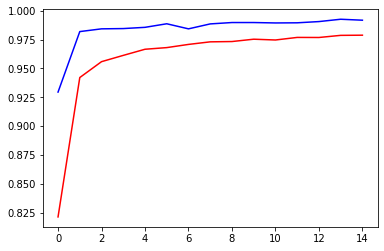

In [84]:
#Comparing losses and accuraries 
# plt.plot(history1.history['loss'], color='r')
# plt.plot(history1.history['val_loss'], color='b')
# plt.show()
plt.plot(history1.history['acc'], color='r')
plt.plot(history1.history['val_acc'], color='b')
plt.show()

In [100]:
#Plotting Confusion Matrix
y_pred1 = model1.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

[[842   0   1   0   0   0   3   0   3   0]
 [  0 935   0   1   1   1   1   1   1   0]
 [  0   1 878   0   2   0   0   2   3   0]
 [  0   0   0 817   0   4   0   1   3   0]
 [  0   1   0   0 785   0   0   0   1   5]
 [  0   0   0   1   0 761   4   0   3   0]
 [  0   0   0   0   1   0 832   0   0   0]
 [  0   0   5   0   5   0   0 857   1   2]
 [  0   0   2   0   0   0   0   0 799   1]
 [  0   0   0   0   3   0   0   0   4 826]]


# Number of neurons (128,256)

In [87]:
#Preparing a CNN model architecture
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 256)       819456    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 12544)           

In [90]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [92]:
#Training the model
history2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
525/525 [==============================] - 332s 632ms/step - loss: 0.6010 - acc: 0.8038 - val_loss: 0.2312 - val_acc: 0.9277
Epoch 2/15
525/525 [==============================] - 340s 647ms/step - loss: 0.1708 - acc: 0.9462 - val_loss: 0.0654 - val_acc: 0.9811
Epoch 3/15
525/525 [==============================] - 343s 653ms/step - loss: 0.1237 - acc: 0.9603 - val_loss: 0.0609 - val_acc: 0.9826
Epoch 4/15
525/525 [==============================] - 341s 650ms/step - loss: 0.1045 - acc: 0.9673 - val_loss: 0.1127 - val_acc: 0.9707
Epoch 5/15
525/525 [==============================] - 343s 654ms/step - loss: 0.0876 - acc: 0.9730 - val_loss: 0.0480 - val_acc: 0.9862
Epoch 6/15
525/525 [==============================] - 346s 658ms/step - loss: 0.0792 - acc: 0.9751 - val_loss: 0.0553 - val_acc: 0.9836
Epoch 7/15
525/525 [==============================] - 342s 651ms/step - loss: 0.0785 - acc: 0.9763 - val_loss: 0.0405 - val_acc: 0.9882
Epoch 8/15
525/525 [============================

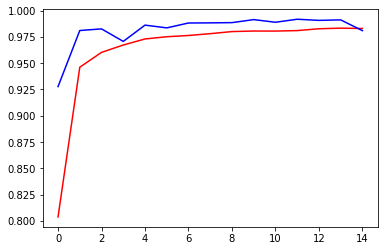

In [93]:
#Comparing losses and accuraries 
# plt.plot(history2.history['loss'], color='r')
# plt.plot(history2.history['val_loss'], color='b')
# plt.show()
plt.plot(history2.history['acc'], color='r')
plt.plot(history2.history['val_acc'], color='b')
plt.show()

In [101]:
#Plotting Confusion Matrix
y_pred1 = model2.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

[[837   0   8   0   0   0   0   0   3   1]
 [  0 915   3   1   8   1   8   4   1   0]
 [  0   1 884   0   0   0   0   0   1   0]
 [  0   0   4 820   0   1   0   0   0   0]
 [  0   0   0   0 787   0   0   1   0   4]
 [  0   0   0   8   0 756   3   0   1   1]
 [  0   0   1   0   1   2 829   0   0   0]
 [  0   0  54   2   4   0   0 810   0   0]
 [  0   0  11   0   0   0   0   1 789   1]
 [  1   0   6   0   9   0   0   1   3 813]]


# 3 conv layers (32,64,128)

In [95]:
#Preparing a CNN model architecture
model3 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='same',),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', padding='same',),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])

model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 128)       

In [96]:
#Compiling the model
model3.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  

In [98]:
#Training the model
history3 = model3.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_val, Y_val),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
525/525 [==============================] - 76s 144ms/step - loss: 0.7123 - acc: 0.7638 - val_loss: 0.0734 - val_acc: 0.9775
Epoch 2/15
525/525 [==============================] - 90s 171ms/step - loss: 0.1902 - acc: 0.9422 - val_loss: 0.0602 - val_acc: 0.9812
Epoch 3/15
525/525 [==============================] - 91s 174ms/step - loss: 0.1390 - acc: 0.9574 - val_loss: 0.0492 - val_acc: 0.9862
Epoch 4/15
525/525 [==============================] - 91s 174ms/step - loss: 0.1211 - acc: 0.9633 - val_loss: 0.0495 - val_acc: 0.9863
Epoch 5/15
525/525 [==============================] - 90s 171ms/step - loss: 0.1021 - acc: 0.9689 - val_loss: 0.0397 - val_acc: 0.9882
Epoch 6/15
525/525 [==============================] - 90s 172ms/step - loss: 0.1000 - acc: 0.9688 - val_loss: 0.0422 - val_acc: 0.9874
Epoch 7/15
525/525 [==============================] - 91s 174ms/step - loss: 0.0892 - acc: 0.9726 - val_loss: 0.0333 - val_acc: 0.9892
Epoch 8/15
525/525 [==============================] - 9

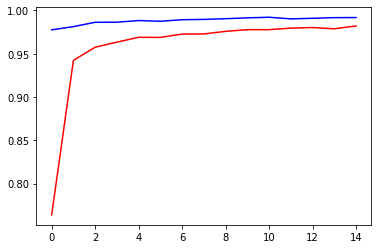

In [99]:
#Comparing losses and accuraries 
# plt.plot(history3.history['loss'], color='r')
# plt.plot(history3.history['val_loss'], color='b')
# plt.show()
plt.plot(history3.history['acc'], color='r')
plt.plot(history3.history['val_acc'], color='b')
plt.show()

In [102]:
#Plotting Confusion Matrix
y_pred1 = model3.predict(X_val)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_val, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

[[845   1   1   0   0   0   0   0   2   0]
 [  0 939   0   0   0   0   0   2   0   0]
 [  0   4 871   3   0   0   1   6   1   0]
 [  0   0   0 821   0   3   0   1   0   0]
 [  0   2   0   0 780   0   0   1   0   9]
 [  1   0   0   4   0 759   2   0   1   2]
 [  0   0   0   0   1   2 829   0   1   0]
 [  0   0   1   1   2   0   0 866   0   0]
 [  1   2   1   1   0   1   1   1 791   3]
 [  1   0   0   0   1   0   0   2   0 829]]
